# Project Title - Data Analysis on High Value Customer Identification 

This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store, downloaded from Kaggle, This project is to analyse and find significant customers for the business who make high purchases of their favourite products. Data preparation and cleaning is done using various libraries such as pandas, datetime and Exploratory analysis and visualization using matplotlib and seaborn.

#### Load the dataset into a data frame using Pandas

Download the dataset Ecommerce manually and upload it via Jupyter's GUI

In [1]:
project_name = "Data Analysis on High Value Customer Identification"

Importing the pandas library for data manipulation and analysis
Importing the datetime module for working with dates and times
Importing the random module for generating random numbers and data

In [2]:
import pandas as pd
import datetime
import random

Reading the 'Ecommerce.csv' file into a pandas DataFrame.
The 'encoding' parameter is set to 'cp1252' to properly handle special characters in the file.

In [3]:
df = pd.read_csv('Ecommerce.csv',encoding='cp1252')

Displaying the first 5 rows of the DataFrame to get a quick look at the data.

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Preparation and Cleaning


##### 1. Exploring the number of rows & columns, ranges of values etc.

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Getting the shape of the DataFrame, which returns a tuple (number of rows, number of columns).
Printing the number of rows in the 'Ecommerce' dataset by accessing the first element of the shape tuple.
Printing the number of columns in the 'Ecommerce' dataset by accessing the second element of the shape tuple.

In [6]:
df.shape
print(f'The Number of Rows in the Ecommerce dataset are: {df.shape[0]}')
print(f'The Number of Columns in the Ecommerce dataset are: {df.shape[1]}')

The Number of Rows in the Ecommerce dataset are: 541909
The Number of Columns in the Ecommerce dataset are: 8


Displaying the column names of the DataFrame to understand the structure of the dataset.

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Displaying a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and the memory usage.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Calculating the total number of missing (null) values in each column of the DataFrame.

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 2. Handling missing, incorrect and invalid data

Generating descriptive statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, min, max, and quartiles.

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The min value in Unit price column is 0 so that is invalid

In [11]:
df.drop(df[df.UnitPrice == 0.0].index, inplace=True)

The min value in quantity column is negative so that is invalid

In [12]:
df.drop(df[df.Quantity < 0].index, inplace=True)

Calculating the number of missing (null) values in the 'CustomerID' column of the DataFrame.

In [13]:
df['CustomerID'].isnull().sum()

132222

Dropping rows with null values

In [14]:
df.dropna(axis = 0,inplace = True)

Generating descriptive statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, min, max, and quartiles.

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


Getting the shape of the DataFrame, which returns a tuple (number of rows, number of columns).

In [16]:
df.shape

(397884, 8)

Calculating the total number of missing (null) values in each column of the DataFrame.

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. parsing dates and creating additional columns.

Converting invoice date object column to datetime format

In [18]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Displaying a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and the memory usage

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


Creating a new column Year

In [20]:
df['Year'] = df['InvoiceDate'].dt.strftime('%Y')

Creating a new column Month

In [21]:
df['Month'] = df['InvoiceDate'].dt.strftime('%m')

Creating a new column date

In [22]:
df['Day'] = df['InvoiceDate'].dt.strftime('%d')

Calculating income from quatity and unit price

In [23]:
df['OverallIncome'] = df['Quantity'] * df['UnitPrice']

Displaying the first 5 rows of the DataFrame to get a quick look at the data.

In [24]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,OverallIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34


## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

Importing the seaborn library for creating statistical graphics and data visualizations.
Matplotlib library for creating static, animated, and interactive visualizations in Python.
pyplot module from matplotlib for plotting graphs and charts.
Configure matplotlib to display plots inline within the Jupyter notebook.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Setting the style of seaborn plots to 'darkgrid' for a grid background on plots, which enhances readability.
Adjusting matplotlib's default font size for text in plots to 14 for better readability.
Setting the default figure size to 10 inches wide by 5 inches tall for all plots.
Setting the background color of figures to be transparent (fully transparent) for a cleaner look.

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Computing the mean, sum, range and other interesting statistics for numeric columns

In [27]:
df.describe()

,Quantity,UnitPrice,CustomerID,OverallIncome
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [28]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,OverallIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34


### 1. Plotting a bar plot for the OverallIncome Income in 12 months

Grouping the DataFrame by the 'Month' column and calculating the Overall income for each month.
Extracting the month names as an index.

Grouping the DataFrame by the 'Month' column and calculating the Overall income for each month.
Extracting the Overall income values corresponding to each month.


In [29]:
Month_grp = df.groupby(df['Month'])['OverallIncome'].sum().index
Income = df.groupby(df['Month'])['OverallIncome'].sum().values


Creating a bar plot with 'Month_grp' on the x-axis and 'Income' on the y-axis using seaborn.
Labeling the x-axis as 'Month_grp' to indicate the categories represented on this axis.
Labeling the y-axis as 'Income' to indicate the values represented on this axis.
Displaying the plot.

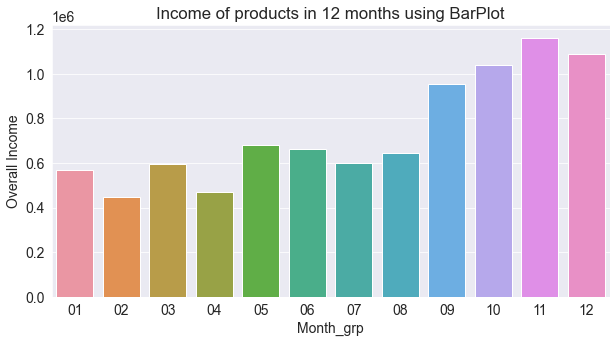

In [30]:
plt.title('Income of products in 12 months using BarPlot')
sns.barplot(x = Month_grp, y = Income)
plt.xlabel ('Month_grp')
plt.ylabel ('Overall Income');

###### From the above bar plot the OverallIncome income is highest in the month of november followed by october, september and december.

The bar plot shows the OverallIncome income of products across 12 months, with each month represented on the x-axis (from "01" to "12") and the income on the y-axis. Here are some key insights based on the visualized data:

### 1. **Income Distribution Across Months**:
   - **November (11)** has the highest income, exceeding 1.2 million units. This suggests that November is the peak month in terms of product income, potentially indicating a seasonal effect (e.g., Black Friday or holiday season sales).
   - **December (12)** also shows a high income, though slightly less than November. This aligns with year-end holiday shopping.
   - **August (08) to October (10)** show a steady increase in income, suggesting a gradual build-up in sales toward the end of the year.
   - **February (02)** has the lowest income, indicating a potential dip in sales after the holiday season.

### 2. **Mid-Year Stability**:
   - From **May (05) to August (08)**, the income is relatively stable, with moderate values. These months do not show extreme peaks or troughs, which might indicate steady business without significant seasonal fluctuations.

### 3. **Potential Seasonality**:
   - The sharp increase in income from October to November suggests strong seasonality, where consumer behavior likely changes dramatically due to events like holiday sales.
   - The drop in February might indicate a post-holiday slowdown in spending.

### 4. **Business Implications**:
   - **High-income months**: The business should focus on optimizing inventory, marketing, and customer engagement strategies in the months leading up to November and December to capitalize on peak income periods.
   - **Low-income months**: Strategies to boost sales, like promotions or discounts, could be employed in months with traditionally lower income, such as February.

In summary, the plot highlights strong seasonality with peaks toward the end of the year, and suggests opportunities for improving sales performance in slower months.

### 2. Exploring distributions of numeric columns using histograms

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,OverallIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34


Distribution of customerID using seaborn.
Create a histogram of the 'CustomerID' column with 50 bins.
The 'bins' parameter specifies the number of bins (or intervals) to use for the histogram

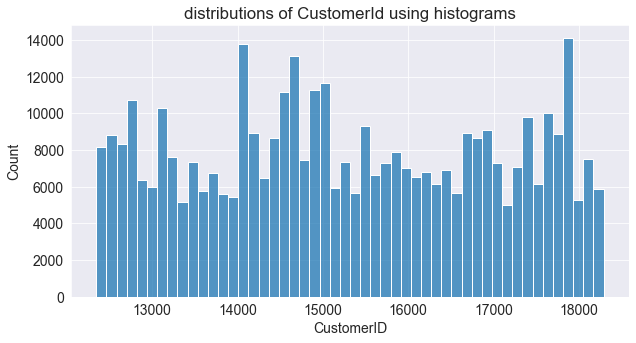

In [32]:
plt.title('distributions of CustomerId using histograms')
sns.histplot(x=df.CustomerID,bins = 50)
plt.xlabel('CustomerID')
plt.ylabel('Count');

##### From the above histogram, the frequency of customer around 18000 customerID's are highest amongst all the customers

The histogram displays the distribution of `CustomerID` values. The x-axis represents the `CustomerID` values, while the y-axis represents the count (frequency) of each `CustomerID` in the dataset.

### Key Insights:

1. **Uneven Distribution**:
   - The distribution of `CustomerID` values is not uniform. Some `CustomerID` ranges have significantly higher counts than others.
   - Peaks at certain `CustomerID` values (e.g., around 14000, 15000, and 18000) indicate that these specific IDs have a much higher frequency in the dataset. This could mean that a few customers are making repeated purchases or have higher transaction activity.
   
2. **Frequent Customers**:
   - The histogram shows that certain customer IDs have a much higher occurrence, which suggests the presence of loyal or repeat customers. This might indicate a pattern of frequent purchasing among a subset of customers.
   
3. **Customer Segmentation**:
   - The differences in frequencies across the `CustomerID` range could help in customer segmentation. For example, customers with high-frequency IDs might be categorized as high-value or repeat customers, while those with lower frequencies might represent occasional buyers.
   
4. **Outliers**:
   - The peaks at specific `CustomerID` ranges, particularly around 18000, might warrant further investigation to understand why certain customers have significantly more transactions than others. This could be due to large corporate accounts, frequent shoppers, or even potential data entry issues.

### Business Implications:
   - **Loyalty Programs**: The frequent occurrence of certain `CustomerID`s suggests opportunities for loyalty programs or targeted marketing strategies to reward repeat customers and encourage further engagement.
   - **Customer Retention**: Identifying and nurturing high-frequency customers could lead to increased revenue and long-term business stability.
   - **Data Quality Check**: The peaks and troughs might also suggest the need to check for any data anomalies or ensure consistency in how customer IDs are being recorded.

In summary, the histogram reveals that customer activity is concentrated in certain ID ranges, indicating the presence of repeat customers or high-frequency purchasers. Understanding this distribution can help tailor marketing strategies and customer retention efforts.

### 3. Explore relationship between customerId's and Overall income using scatter plots

Group the DataFrame by 'CustomerID' and sum the 'OverallIncome' for each 'CustomerID', extract the unique 'CustomerID' values into a list. Group the DataFrame by 'CustomerID' and sum the 'OverallIncome' for each 'CustomerID', extract the corresponding Overall incomes into a list

In [33]:
CustomerID_grp = list(df.groupby(df['CustomerID'])['OverallIncome'].sum().index)
CustomerID_Income= list(df.groupby(df['CustomerID'])['OverallIncome'].sum().values)

Create a scatter plot with 'CustomerID_grp' on the x-axis and 'CustomerID_Income' on the y-axis

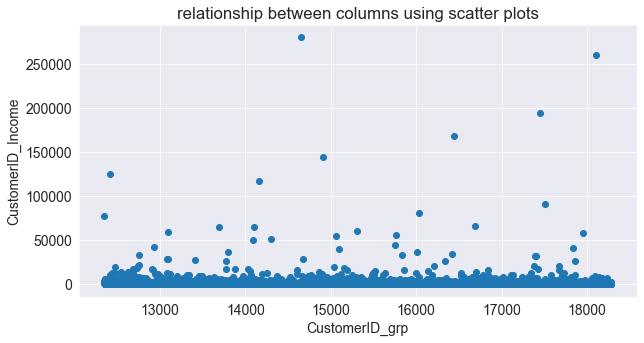

In [34]:
plt.title('relationship between columns using scatter plots')
plt.scatter(CustomerID_grp,CustomerID_Income)
plt.xlabel('CustomerID_grp')
plt.ylabel('CustomerID_Income');

The scatter plot displays the relationship between `CustomerID_grp` (on the x-axis) and `CustomerID_Income` (on the y-axis). Here's what can be inferred from the visualization:

### Key Insights:

1. **Sparse Distribution**:
   - The majority of points (representing customers) cluster at low income levels (close to the x-axis), indicating that most customers generate relatively small amounts of income. This suggests a large base of customers contributing modestly to OverallIncome revenue.
   
2. **Outliers**:
   - A few significant outliers are visible, with some customers generating extremely high income (e.g., above 150,000). These outliers represent high-value customers, who could be responsible for a disproportionate share of the OverallIncome income. They are worth further investigation to understand their behavior and potentially replicate it across other customers.
   
3. **Even Spread of Customers**:
   - There does not appear to be a strong pattern or correlation between `CustomerID_grp` and `CustomerID_Income`, meaning that high incomes are not concentrated within any particular `CustomerID` range. This could suggest that high-income customers are spread out across different customer IDs and not limited to a specific group.

4. **Customer Segmentation**:
   - The plot shows a mixture of high-income and low-income customers across different `CustomerID` groups. This reinforces the potential for segmentation: identifying those high-income outliers for targeted marketing efforts, while also recognizing that most customers fall into a lower-income category.

### Business Implications:

1. **High-Value Customer Focus**:
   - The few customers generating significantly higher income might warrant special attention, such as exclusive deals, personalized services, or loyalty programs aimed at retaining them. Analyzing their purchasing behavior could also help develop strategies to encourage other customers to increase their spending.
   
2. **Volume Strategy**:
   - Since the majority of customers generate smaller income amounts, the business could focus on maximizing the OverallIncome number of these customers, using volume-based strategies such as promotions, discounts, or broad marketing campaigns to boost overall revenue.

3. **Outlier Analysis**:
   - Analyzing the high-income outliers could provide insights into what drives their behavior (e.g., purchasing frequency, product preferences) and help the business replicate these behaviors among other customers.

### Summary:
The scatter plot shows that while most customers generate relatively low income, a few high-income customers contribute disproportionately to the overall revenue. Focusing on both high-value customers and volume strategies for the majority of lower-income customers could optimize business performance.

### 4. Boxplot of UnitPrice column to find out outliers

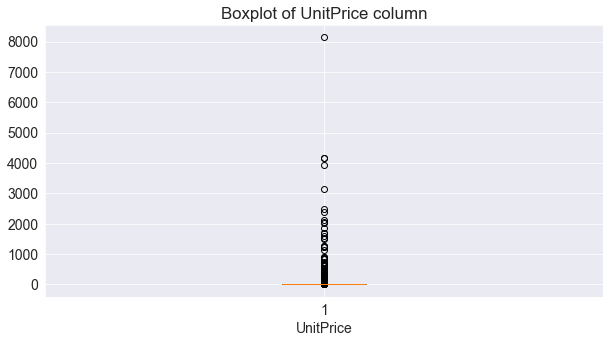

In [35]:
plt.title('Boxplot of UnitPrice column')
plt.boxplot(df.UnitPrice)
plt.xlabel('UnitPrice');

The boxplot displayed is for the "UnitPrice" column of the dataset. Here are the insights that can be drawn from it:

1. **Median and Interquartile Range (IQR):**
   - The central line within the box represents the median of the data. From the plot, the median appears to be close to the lower end, suggesting that a significant portion of the data has relatively low unit prices.
   - The box represents the interquartile range (IQR), which is the range between the 25th percentile (Q1) and the 75th percentile (Q3). The small height of the box indicates that the bulk of the data points are clustered within a narrow range of unit prices.

2. **Outliers:**
   - There are numerous outliers in the dataset, as indicated by the small circles or dots above the whiskers (lines extending from the box). Outliers are data points that fall outside of 1.5 times the IQR from the lower or upper quartile. 
   - Some outliers are extremely high, with prices reaching up to around 8000. This suggests that while most unit prices are low, a few items are significantly more expensive.

3. **Distribution Shape:**
   - The skewness of the data is apparent from the boxplot. The longer upper whisker compared to the lower whisker and the presence of many high-value outliers indicate a right-skewed distribution. This means that while most prices are low, there are some very high unit prices pulling the mean upward.

4. **Possible Implications:**
   - The significant number of outliers suggests that there might be special cases or errors in the dataset that need to be investigated, such as extremely high prices that could be due to misentries or premium products.
   - The distribution of the unit prices could impact statistical analyses, particularly those sensitive to skewed data (e.g., mean calculations). In such cases, it may be necessary to transform the data or use robust statistical methods.

Overall, the boxplot highlights the presence of a typical range of unit prices with a few extreme values that might require further examination.

In [36]:
df[df['UnitPrice'] > 3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,OverallIncome
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,2011,05,03,8142.75
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom,2011,10,03,3155.95
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,2011,10,19,3949.32
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,2011,10,27,4161.06
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.06,12536.0,France,2011,10,27,4161.06


#### Q6: Heatmap of the dataset

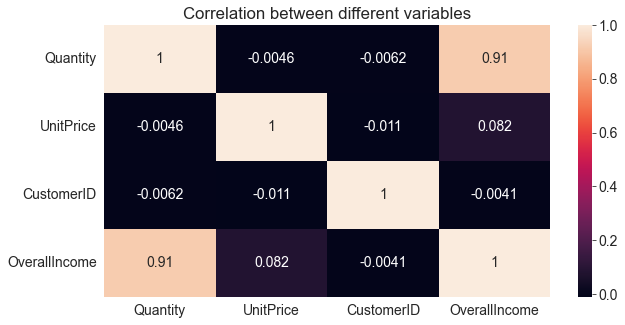

In [37]:
plt.title('Correlation between different variables')
sns.heatmap(df.corr(), annot = True);

##### From the above box plot there are 5 products that are above 3000 , one of which is 8142.75

The heatmap shows the correlation matrix between different variables: `Quantity`, `UnitPrice`, `CustomerID`, and `OverallIncome`. Here's what can be inferred from the heatmap:

### 1. **Correlation between Variables:**
   - **Quantity and OverallIncome:** There is a very strong positive correlation (0.91) between `Quantity` and `OverallIncome`. This suggests that as the quantity of items sold increases, the OverallIncome income also increases significantly. This is expected, as OverallIncome income would typically increase with the number of items sold, assuming a non-zero price.
   - **Quantity and UnitPrice:** The correlation between `Quantity` and `UnitPrice` is nearly zero (-0.0046), indicating that there is no significant linear relationship between the number of items sold and the price per unit. This might suggest that the quantity sold doesn't depend heavily on the unit price.
   - **UnitPrice and OverallIncome:** The correlation between `UnitPrice` and `OverallIncome` is low (0.082), suggesting that the price per unit has a minimal impact on the OverallIncome income. This could mean that OverallIncome income is more influenced by the quantity sold rather than the price.
   - **CustomerID with Other Variables:** The correlation of `CustomerID` with other variables is close to zero (ranging from -0.011 to -0.0041). Since `CustomerID` is likely a categorical variable (used to identify different customers), it isn't expected to have a meaningful correlation with numeric variables like `Quantity`, `UnitPrice`, and `OverallIncome`.

### 2. **General Observations:**
   - **Correlation Strength:** The correlations in this matrix are generally low, with the exception of the strong positive correlation between `Quantity` and `OverallIncome`. This indicates that in this dataset, the OverallIncome income is largely driven by the quantity of items sold rather than the price per unit or customer identity.
   - **Diagonal Values:** The diagonal of the matrix shows perfect correlations (value of 1) because these represent the correlation of each variable with itself.

### 3. **Implications:**
   - **Sales Strategy:** Given that `Quantity` drives `OverallIncome`, strategies that increase the number of items sold (such as promotions, discounts, or bulk sales) might be effective in increasing overall revenue.
   - **Pricing:** Since `UnitPrice` does not strongly correlate with `OverallIncome`, changes in pricing strategy alone may not significantly impact revenue. Instead, focusing on increasing sales volume could be more effective.

This heatmap provides a clear understanding of how different variables relate to each other, which is useful for making informed business decisions.

## Asking and Answering Questions

Here we will find out about the top and bottom 10 customers, top and bottom 10 products



In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,OverallIncome
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,01,20.34


#### Q1: Top 10 customers who generated revenue for the retail store

In [39]:
top10_customers = df.groupby('CustomerID')['OverallIncome'].sum()
top10_customers = top10_customers.sort_values(ascending=False).head(10)
top10_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: OverallIncome, dtype: float64

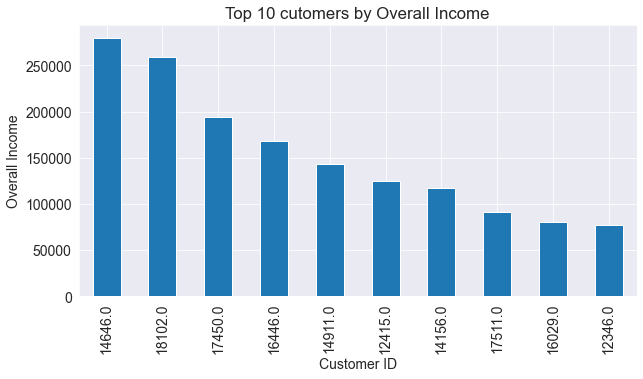

In [40]:
plt.title('Top 10 cutomers by Overall Income')
top10_customers.plot(kind='bar')

plt.xlabel('Customer ID')
plt.ylabel('Overall Income');

##### From the above bar plot the customer with ID - 14646 is the top customer to generate the highest income for the retail store

The bar chart displays the top 10 customers based on their `Overall Income`. Here are the key insights:

### 1. **Top Customers:**
   - **Customer 14646.0** is the highest contributor to OverallIncome income, generating over 250,000 in revenue.
   - **Customer 18102.0** follows closely, also contributing a significant amount, slightly less than the top customer.
   - The top three customers (including Customer 17450.0) contribute significantly more to the OverallIncome income compared to the rest of the top 10.

### 2. **Distribution of Revenue Among Top Customers:**
   - There's a noticeable drop in `OverallIncome` as you move down the list from the top to the tenth customer. The revenue generated by the top two customers is markedly higher than that of the others, indicating that a small number of customers are driving a large portion of the revenue.
   - The decline in `OverallIncome` from the third to the tenth customer is relatively smooth, with each successive customer contributing slightly less than the previous one.

### 3. **Customer Segmentation and Focus:**
   - The significant difference in revenue between the top few customers and the others suggests that these top customers are particularly valuable to the business. Special attention could be given to retain and expand business with these top customers.
   - It may be beneficial to analyze the purchasing patterns of these top customers to understand what drives their high spending, and to see if these strategies can be applied to other customers.

### 4. **Revenue Dependence:**
   - The business appears to be somewhat dependent on a few high-spending customers. This can be both an opportunity (if these customers are loyal and can be encouraged to spend even more) and a risk (if one of these customers were to stop buying, the business could lose a significant portion of its income).

### 5. **Strategic Opportunities:**
   - Consider offering exclusive deals, loyalty programs, or personalized services to the top customers to maintain their high level of spending.
   - Explore ways to increase spending among the lower-ranked customers in this top 10 list, as well as other customers outside the top 10, to diversify income sources.

This bar chart effectively highlights the concentration of income among a few top customers and suggests potential areas for business strategy development.

#### Q1: Bottom 10 customers who generated least revenue for the retail store

In [41]:
bottom10_customers = df.groupby('CustomerID')['OverallIncome'].sum()
bottom10_customers = bottom10_customers.sort_values().head(10)
bottom10_customers

CustomerID
16738.0     3.75
14792.0     6.20
16454.0     6.90
17956.0    12.75
16878.0    13.30
15823.0    15.00
13307.0    15.00
17763.0    15.00
16093.0    17.00
16953.0    20.80
Name: OverallIncome, dtype: float64

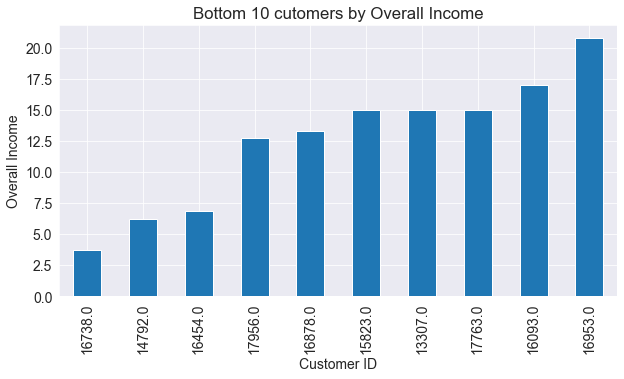

In [42]:
plt.title('Bottom 10 cutomers by Overall Income')
bottom10_customers.plot(kind='bar')
plt.xlabel('Customer ID')
plt.ylabel('Overall Income');

##### From the above bar plot the customer with ID - 16738 is the bottom customer to generate the least income for the retail store

The bar chart represents the "Bottom 10 customers by OverallIncomeIncome." Here are the insights derived from the chart:

1. **Customer Segmentation**: The chart shows the ten customers with the lowest OverallIncome income. The Customer IDs are displayed on the x-axis, while the OverallIncomeIncome is represented on the y-axis.

2. **Income Range**: The OverallIncome income for these customers ranges from approximately 3 to 20 units. This suggests that the lowest earners among your customer base still have some level of income, but there is a significant variation even within this group.

3. **Significant Differences**: The difference between the customer with the lowest income (Customer ID 16738.0) and the highest income within this bottom group (Customer ID 16953.0) is substantial. The highest earner in this group earns more than six times what the lowest earner does.

4. **Income Distribution**: The distribution appears to be somewhat linear, with a few customers earning notably less than others. There isn’t a sharp drop or rise, but rather a gradual increase in OverallIncome income as you move from left to right on the chart.

5. **Targeting Opportunities**: These customers represent the lower end of the income spectrum in your data. You may want to explore why these customers have lower OverallIncome income and consider strategies to increase their spending or engagement.

Overall, the chart suggests a considerable disparity in income levels even among the bottom 10 customers, which could indicate opportunities for growth or areas where further customer analysis is needed.


#### Q3: Top 10 products sold 

In [43]:
top10_products = df.groupby(df['Description'])['Quantity'].sum()
top10_products = top10_products.sort_values(ascending = False).head(10)
top10_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

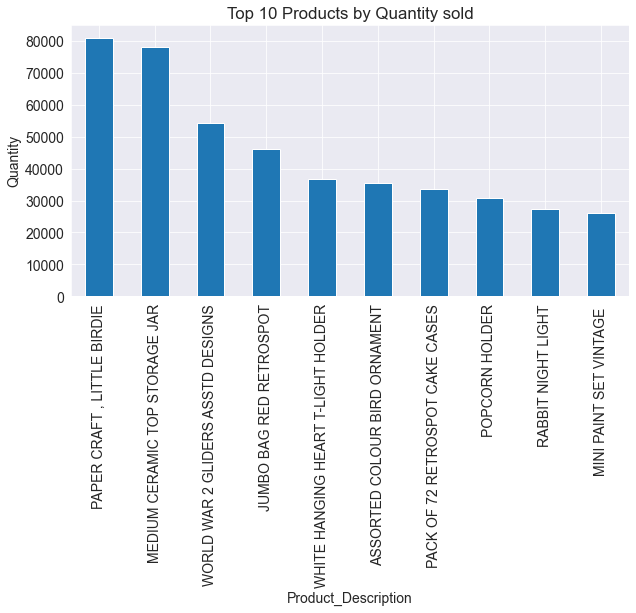

In [44]:
plt.title('Top 10 Products by Quantity sold')
top10_products.plot(kind='bar')
plt.xlabel('Product_Description')
plt.ylabel('Quantity');

##### The above products was sold more than 80995, so the retail store can make sure that it doesn't run out of the top 10 products

The bar chart illustrates the "Top 10 Products by Quantity Sold." Here are the key insights:

1. **Top-Selling Products**: The product "PAPER CRAFT - LITTLE BIRDIE" is the top-selling item, with nearly 80,000 units sold, significantly outperforming the other products in the top 10.

2. **High Performers**: The "MEDIUM CERAMIC TOP STORAGE JAR" is also a strong performer, with sales close to that of the top product. Both these items have sold significantly more units than the others on the list.

3. **Popular Categories**: Products related to home decor and storage (like "CERAMIC TOP STORAGE JAR" and "WHITE HANGING HEART T-LIGHT HOLDER") seem to be quite popular, suggesting that these categories resonate well with customers.

4. **Diverse Product Mix**: The chart shows a diverse range of products, from decorative items (like "ASSORTED COLOUR BIRD ORNAMENT") to practical household items (like "POPORN HOLDER" and "MINI PAINT SET VINTAGE"). This indicates a broad product offering catering to different customer needs.

5. **Sales Drop-Off**: After the top two products, there is a noticeable drop in the quantities sold for the other products. The rest of the top 10 items have a sales range between approximately 30,000 to 45,000 units, indicating that while they are popular, they do not match the top two products in terms of volume.

6. **Potential Focus Areas**: Given the stark difference in sales figures between the top products and the others, it might be beneficial to analyze why certain products are significantly outperforming others. Understanding the factors driving the success of the top sellers could provide insights into improving the sales of other products.

Overall, the chart highlights a few standout products that dominate sales and suggests potential opportunities to boost the sales of other items in the top 10 list.

#### Q4: Bottom 10 products

In [45]:
bottom_10_products = df.groupby(df['Description'])['Quantity'].sum()
bottom_10_products = bottom_10_products.sort_values().head(10)
bottom_10_products

Description
SET OF 3 PINK FLYING DUCKS             1
DOLPHIN WINDMILL                       1
CRACKED GLAZE EARRINGS BROWN           1
LASER CUT MULTI STRAND NECKLACE        1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
CHERRY BLOSSOM PURSE                   1
HEN HOUSE W CHICK IN NEST              1
CAKE STAND LACE WHITE                  1
MARIE ANTOIENETT TRINKET BOX GOLD      1
MUMMY MOUSE RED GINGHAM RIBBON         1
Name: Quantity, dtype: int64

##### The above products are the least sold products

#### Q5: Invoice number which generated the highest income

In [46]:
invoice_1 = df.groupby(df['InvoiceNo'])['OverallIncome'].sum()
invoice_1 = invoice_1.sort_values(ascending = False).head(10)
invoice_1

InvoiceNo
581483    168469.60
541431     77183.60
556444     38970.00
567423     31698.16
556917     22775.93
572209     22206.00
567381     22104.80
563614     21880.44
550461     21535.90
572035     20277.92
Name: OverallIncome, dtype: float64

## Inferences and Conclusion

In the above project we did data preprocessing, data cleaning , handling of missing data , invalid data, incorrect data, converted object column to datetime and created 3 new columns like date , month, year later using various data visualization libraries such as matplotlib and seaborn created plots like barplot - OverallIncome income monthly to find which month generated more revenue, histogram - To find the customerID's with highest count, scatterplot - To evaluate relationship between customerID and OverallIncomeIncome and box plot to find outliers.

Later we found the top and bottom 10 customers and top and bottom 10 products using groupby and sort functions.